In [1]:
import matplotlib.pyplot as plt

In [2]:
def count_calls(counter):
    def decorator(func):
        def wrapper(*args):
            params = f"{args}"
            counter[params] = 1 if params not in counter else counter[params]+1
            return func(*args)
        return wrapper
    return decorator

In [3]:
def get_total(counts):
    total= 0
    for key,value in counts.items():
        total+=value
    return total

## Algorithm

In [16]:
def genSubsets(L):
    counter = {}
    @count_calls(counter)
    def gs(L):
        if len(L) == 0:
            return [[]] # list of empty list
        smaller = gs(L[:-1])
        extra = L[-1:]
        new = []
        for small in smaller:
            counter[f"({L},)"]+=1
            new.append(small+extra)
        return smaller+new
    # main func
    return gs(L), counter

In [32]:
test_num = 10
alg_counts = {}
L = []
for i in range(1,test_num+1):
    L.append(i)
    r,counts = genSubsets(L)
    alg_counts[i] = get_total(counts)
print('done')

done


## Growth

Growth is **Exponantial** : **O(2^n)**

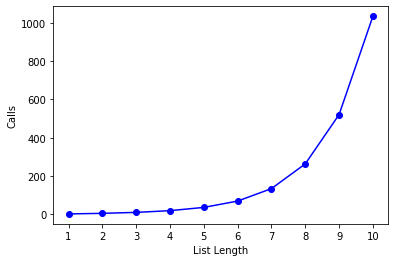

In [38]:
values, calls = zip(*sorted(alg_counts.items()))
plt.plot(values,calls,'bo-')
plt.xlabel('List Length')
plt.ylabel("Calls")
plt.xticks(list(range(1,test_num+1,1)))

plt.show()